### Exploratory data analysis

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
df = pd.read_csv('final_cleaned_dataset.csv')

In [14]:
df.head()

,Unnamed: 0,Country,Sub-national region,latitude,longitude,ISO country code,World region,MPI_Country,MPI_Region,DepvrIntensity,...,Evaporation,Modis_LAI,Modis_EVI,soil_orgc,soil_phaq,soil_clay,soil_silt,soil_sand,Evaporation_m,Modis_LAI_m
0,0,Afghanistan,Badakhshan,36.734772,70.811995,AFG,South Asia,0.295,0.387,57.3,...,3532.0,2.0,732.0,NaN,NaN,NaN,NaN,NaN,3532.0,2.0
1,1,Afghanistan,Badghis,35.167134,63.769538,AFG,South Asia,0.295,0.466,58.8,...,1615.0,2.0,1340.0,NaN,NaN,NaN,NaN,NaN,1615.0,2.0
2,2,Afghanistan,Baghlan,35.804295,69.287753,AFG,South Asia,0.295,0.300,50.3,...,2158.0,1.0,884.0,NaN,NaN,NaN,NaN,NaN,2158.0,1.0
3,3,Afghanistan,Balkh,36.755060,66.897537,AFG,South Asia,0.295,0.301,54.1,...,1482.0,4.0,2028.0,NaN,NaN,NaN,NaN,NaN,1482.0,4.0
4,4,Afghanistan,Bamyan,34.810007,67.821210,AFG,South Asia,0.295,0.325,53.3,...,2744.0,4.0,1261.0,NaN,NaN,NaN,NaN,NaN,2744.0,4.0


In [15]:
df.shape

(955, 30)

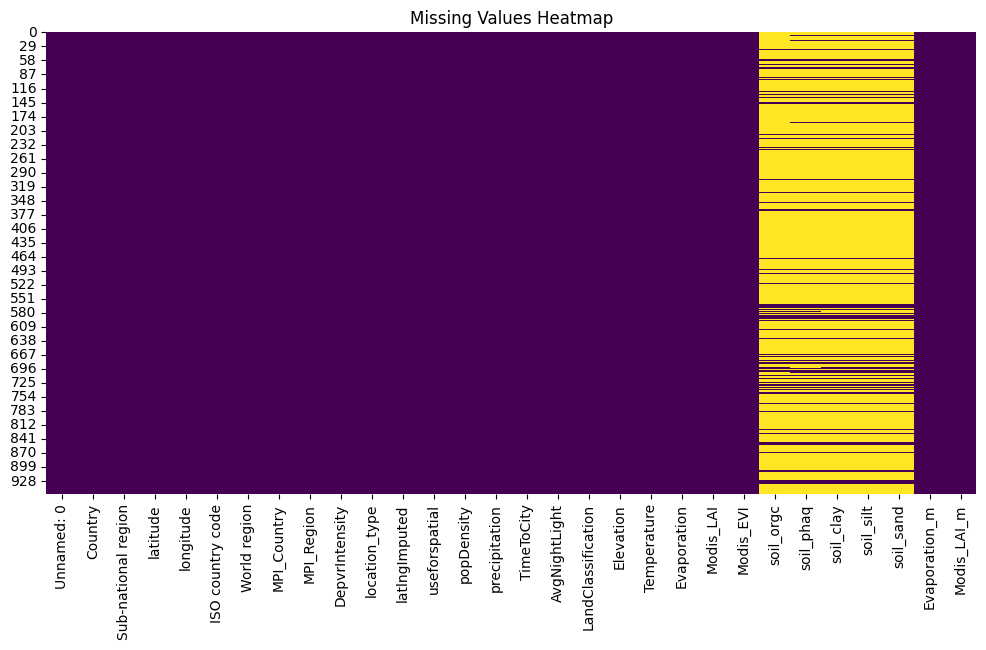

In [20]:
# Check missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


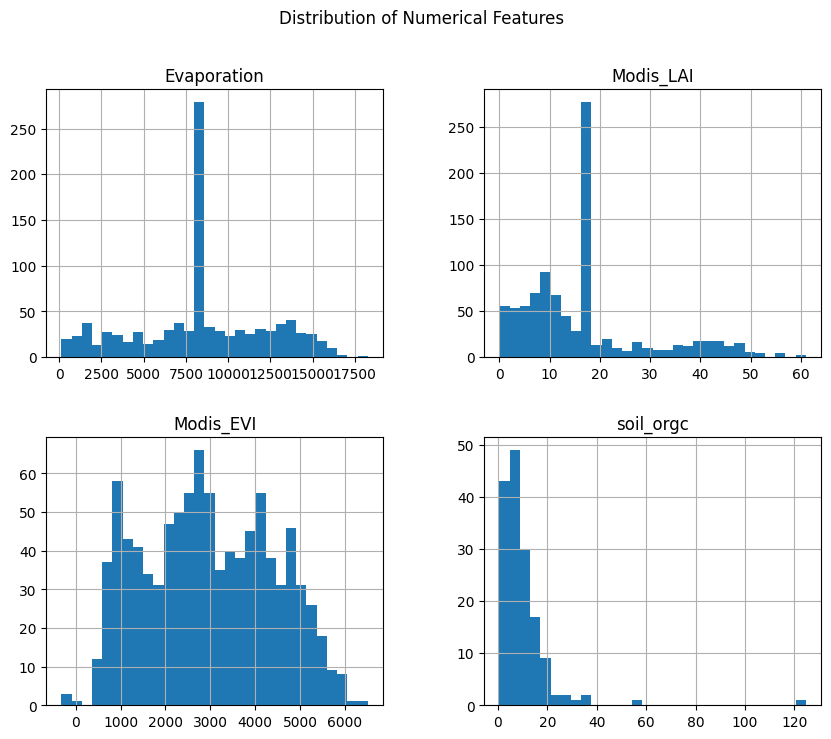

In [21]:
# Histogram for numerical columns
num_columns = ['Evaporation', 'Modis_LAI', 'Modis_EVI', 'soil_orgc']
df[num_columns].hist(figsize=(10, 8), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()


In [22]:
# geospatial 
import geopandas as gpd
import folium

# Create a map centered around the data points
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Region: {row['Sub-national region']}, Evaporation: {row['Evaporation']}"
    ).add_to(m)

m.save("geospatial_plot.html")


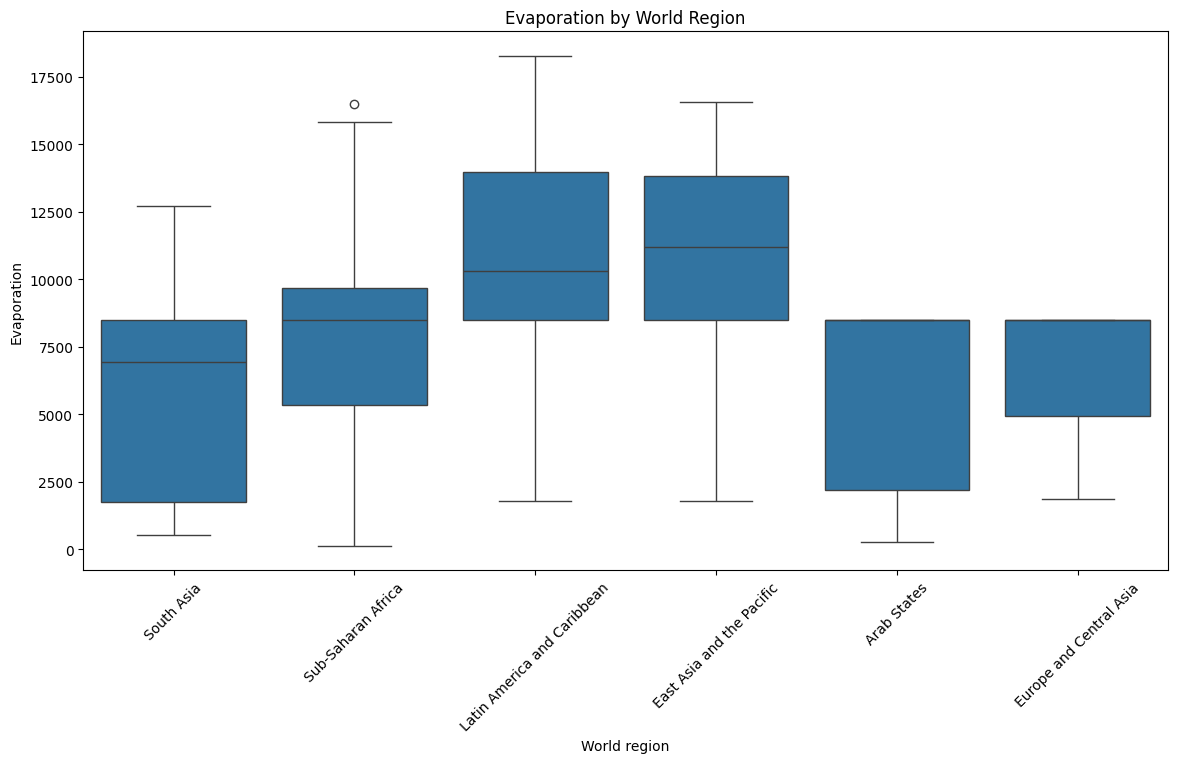

In [24]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='World region', y='Evaporation', data=df)
plt.xticks(rotation=45)
plt.title('Evaporation by World Region')
plt.show()


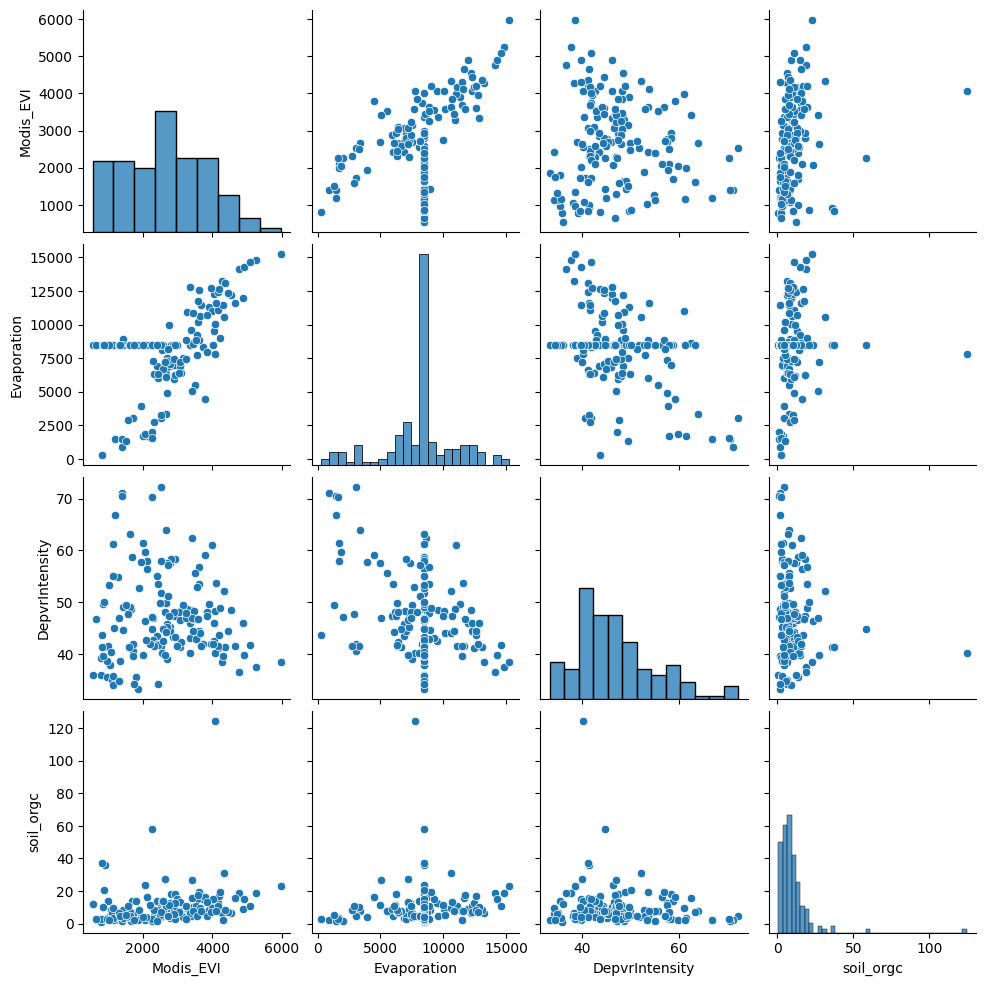

In [25]:
from seaborn import pairplot

selected_features = ['Modis_EVI', 'Evaporation', 'DepvrIntensity', 'soil_orgc']
sns.pairplot(df[selected_features].dropna())
plt.show()


In [27]:
df.columns

Index(['Unnamed: 0', 'Country', 'Sub-national region', 'latitude', 'longitude',
       'ISO country code', 'World region', 'MPI_Country', 'MPI_Region',
       'DepvrIntensity', 'location_type', 'latlngImputed', 'useforspatial',
       'popDensity', 'precipitation', 'TimeToCity', 'AvgNightLight',
       'LandClassification', 'Elevation', 'Temperature', 'Evaporation',
       'Modis_LAI', 'Modis_EVI', 'soil_orgc', 'soil_phaq', 'soil_clay',
       'soil_silt', 'soil_sand', 'Evaporation_m', 'Modis_LAI_m'],
      dtype='object')